# Morris Lee 10/11/2021
To Company: MoneyLion

# Abstract

As a result from the exploratory, we can know that a loan is risky when the loan payment checked percentage below 30%. This is because the average payment checked percentage of overall payment is 30.4079%. Therefore, the loan status such as "Internal Collection", ''Charged Off Paid Off'."External Collection", "Returned Item" are considered risky. 


It is clear that we need to reduce the likelihood of unfavorable loan status before it has happend. But how can we do that? One of the methods proposed here is to use supervised learning classification method to predict the loan status given the loan data. So that company can take initiative to reject high risk loans before they are funded. This notebook will also show how the classification method implemented

By using Naive Bayes BernoulliNB, one can make classification prediction of different loan status with a Test Predict accuracy of 0.815

# Summary of Insights

1. Which method is the most common repayment frequency? \
<font color='blue'>biweekly payments</font>
2. How is the distribution of the loan dataset? \
<font color='blue'>The nPaidOff, loanAmount, and originallyScheduledPaymentAmount are skewed to the right (mean>mode). Meanwhile, apr is skewed to the left (mode>mean)</font>
2. What is the average loan apr? \
<font color='blue'>553.08</font>
3. What is the valid range of the loan apr? \
<font color='blue'>The valid range is between 767.5 and 323.5, the value fall outside the range are outliers</font>
4. How is the trend of the Duration between Application Date to Originated Date from 2015 to 2017 \
<font color='blue'>The duration is getting shorter, and lesser outliers of long duration, which is getting explicit in 2016 and 2017</font>
5. Is there any significant positive correlations for numerical attributes?\
<font color='blue'>Yes, there are:</font> \
<font color='blue'>approved, isFunded -	0.985783</font> \
<font color='blue'>originated, approved -	0.927619</font> \
<font color='blue'>originated, isFunded - 0.914481</font> \
<font color='blue'>loanAmount, originallyScheduledPaymentAmount - 0.892881</font>
6. Is there any loan approved but not funded? If yes, how many of them? \
<font color='blue'>Yes, There are 1054 of loans approved but not funded, amounting to 0.0263% of overall approved loans</font>
7. What is the most common of loan status? Ratio of it? \
<font color='blue'>There are 450984 of withdrawn loans, which means that applicant notified the lender they no longer want their loan application processed, amounting to 78% of overall loans</font> \
8. How many of the loan status are paid off loan? Ratio of it? \
<font color='blue'>There are 11427 of paid off loans, which means that applicant, amounting to 1.98% of overall loans</font>
9.How is the ratio of Custom Collection?
<font color='blue'>There are 13895 of payment required custom collection, amounting to 0.1529% of overall payment</font>
10. How is the value counts of paymentStatus?\
<font color='blue'>Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330 ...</font>
11. How is the percentage of payment checked?\
<font color='blue'>There are 209621 of payment checked (successful), amounting to 30.4079% of overall payment</font>
13. How many of it has listed paymentReturnCode?\
<font color='blue'>There are 31533 of payment has return code (failed), amounting to 4.7935% of overall payment</font>
14. If loan is not funded, is there payment checked?\
<font color='blue'>Yes, There is 349 payment checked, although loan is not funded</font>

# Contents
[**A. LOAN DATASET**](#univariate)  
* [Which method is the most common repayment frequency?](#1)
* [How is the distribution of the loan dataset?](#2)
* [What is the average loan apr?](#3)
* [What is the valid range of the loan apr?](#4)
* [How is the trend of the Duration between Application Date to Originated Date?](#5)
* [Is there any significant positive correlations for numerical attributes?](#6)
* [Is there any loan approved but not funded? If yes, how many of them?](#7)
* [What is the most common loan status? Ratio of it?](#8)
* [How many of the loan status are paid off loan? Ratio of it?](#9)
* [How is the relationship loan status and (loan_originated, loan_approved & loan_isFunded)?](#10)

[**B. LOAN & PAYMENT DATASET**](#B) 
* [How is the ratio of Custom Collection?](#11)
* [How is the value counts of paymentStatus?](#22)
* [How is the percentage of payment checked?](#33)
* [To identify value counts of paymentReturnCode](#44)
* [How many of it has listed paymentReturnCode?](#55)
* [If loan is not funded, is there payment checked?](#66)

[**C. RISKY LOAN**](#C)
* [How to determine risky loan given the dataset?](#111)
* [Results and Explaination](#222)

[**D. SOLUTION: MODELS BUILDING AND PREDICTION**](#D)
* [Data cleaning](#1111)
* [Datasets Splitting](#2222)
* [Models Training](#3333)
* [Models Testing](#4444)


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
path = "C:/Users/Lee Kah Win/Desktop/moneylion/data"
os.chdir(path)
loan = pd.read_csv("loan.csv")
payment = pd.read_csv("payment.csv")
clarity = pd.read_csv("clarity_underwriting_variables.csv")

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# A. LOAN DATASET<a id=univariate><a>

In [2]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

## Which method is the most common repayment frequency? <a id=1><a>

From the pie chart, we can notice that the most common repayment frequency is "Biweekly". The subsequents are (in Descending order): Weekly, Monthly, Irregular and the least is Semi-monthly

payFrequency
B               316654
W               137188
M                59092
I                33787
S                29688
dtype: int64
There are 316654 of biweekly payFrequency Loan, amounting to 54.9356% of overall loans


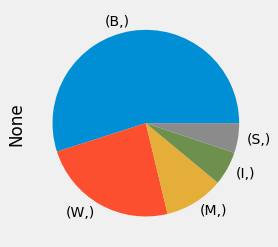

In [4]:
#To check the each of the repayment frequency of the Loan
print(loan[['payFrequency']].value_counts())
loan[['payFrequency']].value_counts().plot(kind='pie')

#To check the ratio of the biweekly frequency of the Loan
loan=loan.copy()
overall = loan[loan['payFrequency'].notna()]
biweekly = loan[loan['payFrequency'] == 'B']
num_biweekly = len(biweekly.index)
ratio_biweekly =num_biweekly/len(overall.index)*100
print(f"There are {num_biweekly} of biweekly payFrequency Loan, \
amounting to {round(ratio_biweekly, 4)}% of overall loans")

## How is the distribution of the loan dataset? <a id=2><a>

In [5]:
def distribution(df):
    list(set(df.dtypes.tolist()))
    # include only float and integer
    df_num = df.select_dtypes(include = ['float64'])
    return df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

array([[<AxesSubplot:title={'center':'apr'}>,
        <AxesSubplot:title={'center':'nPaidOff'}>],
       [<AxesSubplot:title={'center':'loanAmount'}>,
        <AxesSubplot:title={'center':'originallyScheduledPaymentAmount'}>]],
      dtype=object)

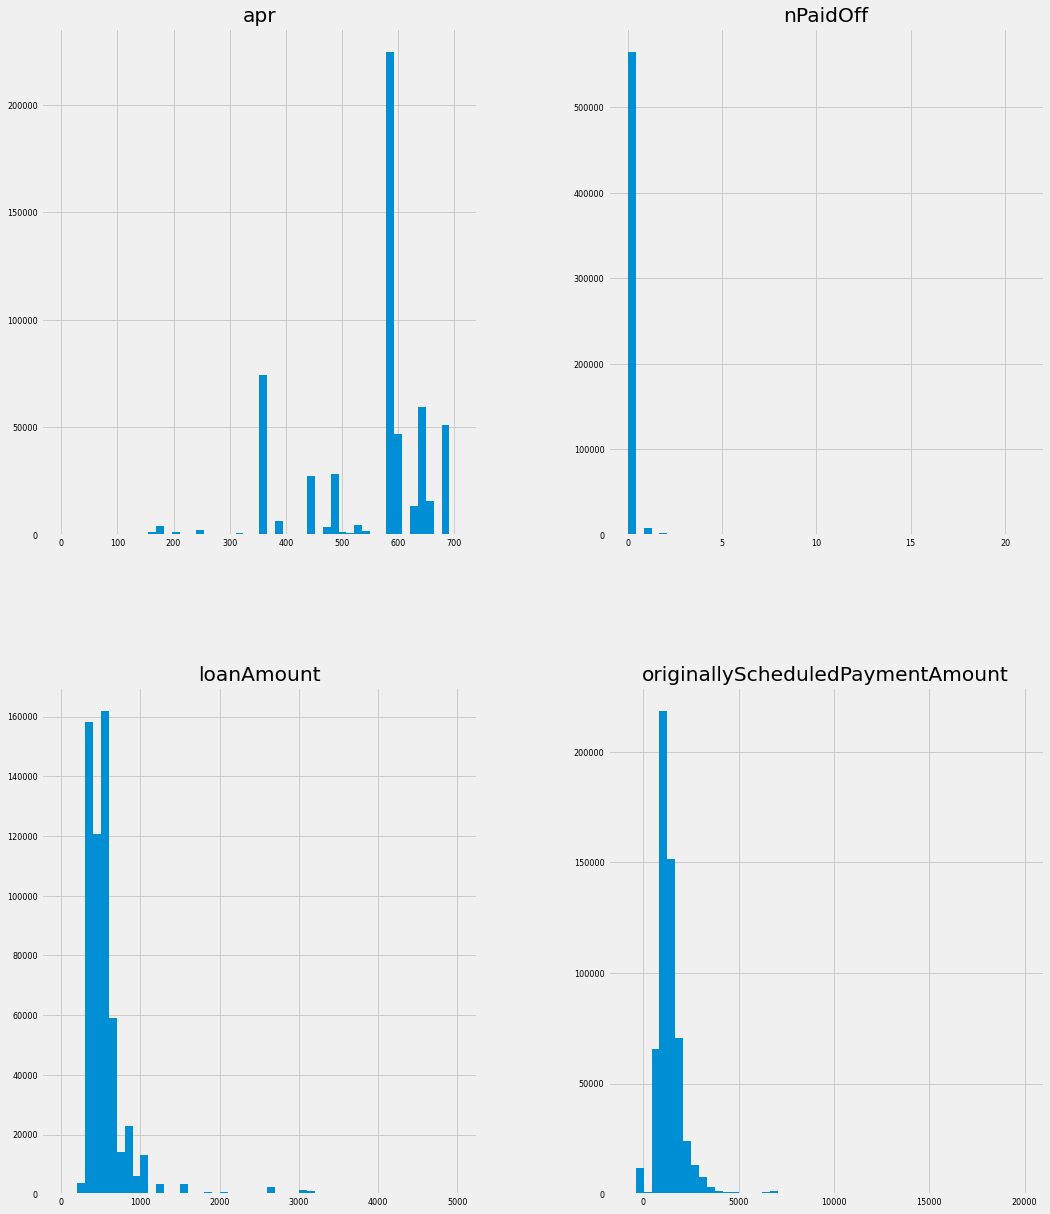

In [6]:
distribution(loan)
# From the loan dataset, we can know that nPaidOff, loanAmount, and originallyScheduledPaymentAmount are 
# skewed to the right (mean>mode). Meanwhile, apr is skewed to the left (mode>mean)

## What is the average loan apr? <a id=3><a>

In [7]:
# to know what is the average loan apr
loan[['apr']].describe()

,apr
count,573760.000000
mean,553.080972
std,110.046159
min,0.000000
25%,490.000000
50%,590.000000
75%,601.000000
max,705.590000


## What is the valid range of the loan apr? <a id=4><a>

The annual cost of a loan to a borrower is having a mean of 553.08. And we can also notice that the values that less than 323.5 are considered outlier. We can find out what are the causes to the apr less than 323.5. There are 2 solutions:
(1) Check whether there is no loan that is approved or funded
(2) Check whether the loan amount is very small compared to others

In [8]:
def iqr(Q3,Q1):
    IQR=Q3-Q1
    S=1.5*IQR
    UB=Q3+S
    LB=Q1-S
    return UB, LB

In [9]:
UB, LB = iqr(601,490)
print(f"The valid range is between {UB} and {LB}, the value fall outside the range are outliers")

The valid range is between 767.5 and 323.5, the value fall outside the range are outliers


## To know the duration between applicationDate and originatedDate

For the duration of loan application to Date of origination:\
The average duration is 22 hours 55 minutes.\
The median value is 2 hours and 19 minutes.\
We can also notice an error here as there is negative duration, which we need to find it out

In [10]:
# To change data type to datetime
loan['applicationDate']=loan['applicationDate'].astype('datetime64')
loan['originatedDate']=loan['originatedDate'].astype('datetime64')
# To compute the duration between originatedDate and applicationDate
loan['Difference'] = (loan['originatedDate'].dropna(how='all') - loan['applicationDate'])
loan['Difference'] = loan['Difference'].dt.total_seconds()/3600
loan[['Difference']].dropna(how='all')
loan[['Difference']].describe()

,Difference
count,46044.000000
mean,22.928740
std,76.706759
min,-6.861352
25%,0.350457
50%,2.328869
75%,19.063440
max,5888.781163


In [11]:
# There is only one entry that the originatedDate is before the applicationDate
negative_duration = loan[loan['Difference'] <0]
negative_duration

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,Difference
229094,LL-I-00000231,8775996c9eb007d33a874648e3857e82,B,478.67,2014-12-03 00:39:02.866,True,2014-12-02 17:47:22,NaN,True,1,External Collection,800.0,1919.28,OH,lead,6,Checked,NaN,0,-6.861352


In [12]:
# We can drop the entry
loan_duration = loan[loan['Difference'] >= 0]
loan_duration[['Difference']].describe()

,Difference
count,46043.000000
mean,22.929387
std,76.707466
min,0.000096
25%,0.350462
50%,2.329610
75%,19.063525
max,5888.781163


## How is the trend of the Duration between Application Date to Originated Date? <a id=5><a>

In [13]:
# To select columns of 'Difference', 'applicationDate'
app_visual = loan_duration[['Difference', 'applicationDate']].dropna()
app_visual['applicationDate'] =pd.to_datetime(app_visual.applicationDate)
# To sort the date in ascending order
app_visual = app_visual.sort_values(by='applicationDate')
# To make the applicationDate as the index
app_visual = app_visual.set_index('applicationDate')
app_visual.head()

,Difference
applicationDate,
2014-12-03 00:31:22.306,2.693378
2014-12-03 00:39:07.767,40.794973
2014-12-03 00:41:27.773,2.524623
2014-12-03 00:43:10.714,2.495739
2014-12-03 00:47:06.203,16.648293


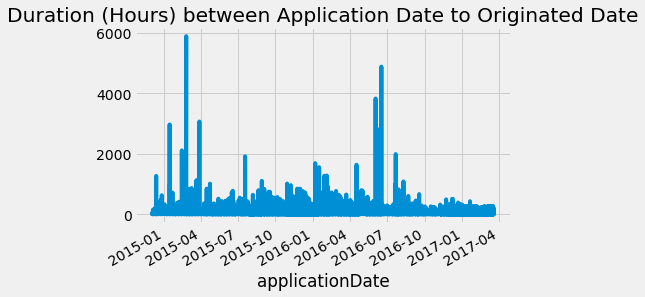

In [14]:
app_visual["Difference"].plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Duration (Hours) between Application Date to Originated Date')
plt.show()

In [15]:
print(loan_duration['loanStatus'].value_counts())

Paid Off Loan                  11427
External Collection            11333
New Loan                        8112
Withdrawn Application           6008
Internal Collection             5564
Returned Item                   1182
Settlement Paid Off              708
Credit Return Void               704
Customer Voided New Loan         335
Settled Bankruptcy               325
Pending Paid Off                 169
Charged Off Paid Off             159
CSR Voided New Loan                8
Pending Rescind                    4
Voided New Loan                    2
Customver Voided New Loan          1
Settlement Pending Paid Off        1
Charged Off                        1
Name: loanStatus, dtype: int64


## To identify relationship loan status and (loan_originated,	loan_approved &	loan_isFunded)

<a id=10><a>

(1) When loan originated and loan approved, there is no more loan status of:
1. "Rejected", \
2. 'Pending Application Fee' \
3. 'Pending Application'\

(2) When loan is funded, there is no more loan status of:
1. 'Withdrawn Application', \
2. 'CSR Voided New Loan'\
3. 'Credit Return Void'\
4. 'Customer Voided New Loan'\
5. 'Pending Rescind'\
6. 'Voided New Loan'\
7. 'Customver Voided New Loan'


In [16]:
loan_originated = loan[loan['originated'] == True]
loan_approved = loan[loan['approved'] == True]
loan_isFunded = loan[loan['isFunded'] == 1]

In [17]:
value_full = loan['loanStatus'].value_counts().rename_axis('loan_status').reset_index(name='all')
value_originated = loan_originated['loanStatus'].value_counts().rename_axis('loan_status').reset_index(name='loan_originated')
value_approved = loan_approved['loanStatus'].value_counts().rename_axis('loan_status').reset_index(name='loan_approved')
value_isFunded = loan_isFunded['loanStatus'].value_counts().rename_axis('loan_status').reset_index(name='loan_isFunded')
value_isFunded

,loan_status,loan_isFunded
0,Paid Off Loan,11427
1,External Collection,11334
2,New Loan,8112
3,Internal Collection,5564
4,Returned Item,1182
5,Settlement Paid Off,708
6,Settled Bankruptcy,325
7,Pending Paid Off,169
8,Charged Off Paid Off,159
9,Settlement Pending Paid Off,1


In [18]:
# To merge all datasets to compare easily
value_full_originated = pd.merge(value_full , value_originated, how='left', on='loan_status')
value_full_originated_approved = pd.merge(value_full_originated , value_approved, how='left', on='loan_status')
value_full_originated_isFunded = pd.merge(value_full_originated_approved , value_isFunded, how='left', on='loan_status')
value_full_originated_isFunded

,loan_status,all,loan_originated,loan_approved,loan_isFunded
0,Withdrawn Application,450984,5973.0,4.0,NaN
1,Rejected,85070,NaN,NaN,NaN
2,Paid Off Loan,11427,11427.0,11427.0,11427.0
3,External Collection,11334,11334.0,11334.0,11334.0
4,New Loan,8112,8112.0,8112.0,8112.0
5,Internal Collection,5567,5564.0,5564.0,5564.0
6,Returned Item,1182,1182.0,1182.0,1182.0
7,CSR Voided New Loan,1026,8.0,8.0,NaN
8,Settlement Paid Off,708,708.0,708.0,708.0
9,Credit Return Void,704,702.0,701.0,NaN


In [19]:
# to filter Nan of Loan_isFunded
key = value_full_originated_isFunded["loan_isFunded"].isnull()
df_NA = value_full_originated_isFunded.loc[key]
df_NA

,loan_status,all,loan_originated,loan_approved,loan_isFunded
0,Withdrawn Application,450984,5973.0,4.0,NaN
1,Rejected,85070,NaN,NaN,NaN
7,CSR Voided New Loan,1026,8.0,8.0,NaN
9,Credit Return Void,704,702.0,701.0,NaN
10,Customer Voided New Loan,504,334.0,334.0,NaN
14,Pending Application Fee,5,NaN,NaN,NaN
15,Pending Rescind,4,4.0,4.0,NaN
16,Pending Application,4,NaN,NaN,NaN
17,Voided New Loan,2,2.0,2.0,NaN
20,Customver Voided New Loan,1,1.0,1.0,NaN


In [20]:
df_noNA = value_full_originated_isFunded.loc[~key]
df_noNA
# I want to know for each loan_status payment checked frequency

,loan_status,all,loan_originated,loan_approved,loan_isFunded
2,Paid Off Loan,11427,11427.0,11427.0,11427.0
3,External Collection,11334,11334.0,11334.0,11334.0
4,New Loan,8112,8112.0,8112.0,8112.0
5,Internal Collection,5567,5564.0,5564.0,5564.0
6,Returned Item,1182,1182.0,1182.0,1182.0
8,Settlement Paid Off,708,708.0,708.0,708.0
11,Settled Bankruptcy,326,325.0,325.0,325.0
12,Pending Paid Off,169,169.0,169.0,169.0
13,Charged Off Paid Off,160,159.0,159.0,159.0
18,Settlement Pending Paid Off,1,1.0,1.0,1.0


## What is the most common loan status? Ratio of it? <a id=8><a>

In [21]:
withdrawn = loan[loan['loanStatus'] == 'Withdrawn Application']
num_withdrawn = len(withdrawn.index)
ratio_withdrawn =num_withdrawn/len(loan.index)*100
print(f"There are {num_withdrawn} of withdrawn loans, which means that applicant \
no longer want their loan application processed, \
amounting to {round(ratio_withdrawn, 4)}% of overall loans")

There are 450984 of withdrawn loans, which means that applicant no longer want their loan application processed, amounting to 78.0679% of overall loans


# How many of the loan status are paid off loan? Ratio of it? <a id=9><a>

In [22]:
paidOff = loan[loan['loanStatus'] == 'Paid Off Loan']
num_paidOff = len(paidOff.index)
ratio_paidOff =num_paidOff/len(loan.index)*100
print(f"There are {num_paidOff} of paid off loans, which means that applicant, \
amounting to {round(ratio_paidOff, 4)}% of overall loans")

There are 11427 of paid off loans, which means that applicant, amounting to 1.9781% of overall loans


## Is there any loan approved but not funded? If yes, how many of them? <a id=7><a>

In [23]:
loan_approved = loan[loan['approved'] == True]
loan_approved_notFunded = loan_approved[loan_approved['isFunded'] == 0]
num_approved_notFunded =len(loan_approved_notFunded.index)
ratio_approved_notFunded =num_approved_notFunded/len(loan_approved.index)
print(f"There are {num_approved_notFunded} of loans approved but not funded, \
amounting to {round(ratio_approved_notFunded, 4)}% of overall approved loans")

There are 1054 of loans approved but not funded, amounting to 0.0263% of overall approved loans


## Is there any significant positive correlations for numerical attributes? <a id=6><a>

In [24]:
def corr_sort_positive(df):
    import numpy as np
    import pandas as pd
    corr_matrix = df.corr()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    corr = pd.DataFrame(sol, columns=['corr'])
    return corr.head(10)
def corr_sort_negative(df):
        import numpy as np
        import pandas as pd
        corr_matrix = df.corr()
        sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                          .stack()
                          .sort_values(ascending=True))
        corr = pd.DataFrame(sol, columns=['corr'])
        return corr.head(10)

In [25]:
# to check top 10 positive correlation of loan dataset
corr_sort_positive(loan)

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


corr
approved                         isFunded                          0.985783
originated                       approved                          0.927619
                                 isFunded                          0.914481
loanAmount                       originallyScheduledPaymentAmount  0.892881
nPaidOff                         isFunded                          0.269711
                                 approved                          0.267276
originated                       nPaidOff                          0.251177
leadCost                         hasCF                             0.210834
loanAmount                       leadCost                          0.204856
originallyScheduledPaymentAmount leadCost                          0.191381

In [26]:
# to check top 10 positive correlation of payment dataset
# principal and paymentAmount has significant correlations
corr_sort_positive(payment)

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


corr
principal        paymentAmount  0.824481
fees             paymentAmount  0.634756
principal        fees           0.089111
isCollection     principal      0.080290
installmentIndex principal      0.046457
isCollection     paymentAmount -0.000233
installmentIndex isCollection  -0.074657
isCollection     fees          -0.114381
installmentIndex paymentAmount -0.170524
                 fees          -0.363816

In [27]:
# to check negative correlation, sort in descending order
# there is no significant negative correlations for loan dataset
corr_sort_negative(loan)

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


corr
apr      loanAmount                       -0.279014
         leadCost                         -0.090854
         nPaidOff                         -0.074328
         isFunded                         -0.062981
         approved                         -0.062880
         originated                       -0.062596
         originallyScheduledPaymentAmount -0.049065
nPaidOff leadCost                         -0.046266
         hasCF                            -0.046038
apr      hasCF                            -0.038632

In [28]:
# to check negative correlation, sort in descending order
# there is no significant negative correlations for payment dataset
corr_sort_negative(payment)

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


corr
installmentIndex fees          -0.363816
                 paymentAmount -0.170524
isCollection     fees          -0.114381
installmentIndex isCollection  -0.074657
isCollection     paymentAmount -0.000233
installmentIndex principal      0.046457
isCollection     principal      0.080290
principal        fees           0.089111
fees             paymentAmount  0.634756
principal        paymentAmount  0.824481

# B. LOAN & PAYMENT DATASET <a id=B><a>  

In [29]:
payment.head(3)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN


In [30]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      689364 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


In [31]:
# What is the average installmentIndex for each loan?
payment.installmentIndex.describe()

count    689364.000000
mean         10.553222
std           8.049530
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max         105.000000
Name: installmentIndex, dtype: float64

## How is the ratio of Custom Collection? <a id=11><a>

In [32]:
# How is the ratio of Custom Collection
print(payment.isCollection.value_counts())
payment_isCollection = payment[payment['isCollection'] == True]
num_payment_isCollectiond =len(payment_isCollection.index)
ratio_payment_isCollection =num_approved_notFunded/len(payment.index)*100
print("\n")
print(f"There are {num_payment_isCollectiond} of payment required custom collection, \
amounting to {round(ratio_payment_isCollection, 4)}% of overall payment")

False    675469
True      13895
Name: isCollection, dtype: int64


There are 13895 of payment required custom collection, amounting to 0.1529% of overall payment


## How is the value counts of paymentStatus? <a id=22><a>

In [33]:
#How is the value counts of paymentStatus?
print(payment.paymentStatus.value_counts())

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Complete                        1
Returned                        1
Name: paymentStatus, dtype: int64


## How is the percentage of payment checked? <a id=33><a>

In [34]:
payment_isChecked = payment[payment['paymentStatus'] == "Checked"]
num_payment_isChecked =len(payment_isChecked.index)
ratio_payment_isChecked =num_payment_isChecked/len(payment.index)*100
print(f"There are {num_payment_isChecked} of payment checked (successful), \
amounting to {round(ratio_payment_isChecked, 4)}% of overall payment")

There are 209621 of payment checked (successful), amounting to 30.4079% of overall payment


## To identify value counts of paymentReturnCode <a id=44><a>

In [35]:
# To identify value counts of paymentReturnCode
print(payment.paymentReturnCode.value_counts())

R01       22866
R02        2761
R08        2259
R16        1085
R10         620
MISSED      537
R03         318
RXS         226
R09         176
R07         160
C05         106
C01          87
R20          83
R99          60
RAF          58
R04          39
C03          34
C02          10
LPP01         7
RWC           7
R06           6
RUP           6
RBW           5
R29           4
RFG           3
R15           3
R13           2
C07           2
RXL           1
R19           1
RIR           1
Name: paymentReturnCode, dtype: int64


## How many of it has listed paymentReturnCode <a id=55><a>

In [36]:
# How many of it has listed paymentReturnCode
key = payment["paymentReturnCode"].isnull()
num_payment_noReturnCode = len(payment.loc[key].index)
num_payment_ReturnCode = len(payment.loc[~key].index)
percentage_ReturnCode = num_payment_ReturnCode/num_payment_noReturnCode*100
print(f"There are {num_payment_ReturnCode} of payment has return code (failed), \
amounting to {round(percentage_ReturnCode, 4)}% of overall payment")

There are 31533 of payment has return code (failed), amounting to 4.7935% of overall payment


1. What is the average installmentIndex for each loan?
It has a average of 10.55 and a median of 9.0
2. How is the ratio of Custom Collection
There are 13895 of payment required custom collection, amounting to 0.1529% of overall payment
3. How is the percentage of payment checked?
There are 209621 of payment checked (successful), amounting to 30.4079% of overall payment
4. How many of it has listed paymentReturnCode
There are 31533 of payment has return code (failed), amounting to 4.7935% of overall payment
5. If the loan is not funded, does it still has payment, if payment checked, how many of it?
Yes, there is 349 payment checked, although loan is not funded
6. For PaidoFF loan, how is the percentage of payment checked?
There are 111424 of payment checked (successful), amounting to 59.0051% of overall payment

## If loan is not funded, is there payment checked? <a id=66><a>

In [37]:
loan_notFunded =loan[loan['isFunded'] == 0]
loan_notFunded.head(3)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,Difference
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1,NaN
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1,NaN


In [38]:
loan_notFunded_payment = pd.merge(loan_notFunded , payment, how='left', on='loanId')
loan_notFunded_payment.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,hasCF,Difference,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05 22:31:34.304,False,NaT,0.0,False,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LL-I-09734486,b5541f49472fa0fce8e473306768f7fb,M,650.0,2016-06-12 19:27:47.951,False,NaT,0.0,False,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
key = loan_notFunded_payment["paymentStatus"].isnull()
num_loan_notFunded_payment = len(loan_notFunded_payment.loc[~key].index)
num_loan_notFunded_payment_checked =\
len(loan_notFunded_payment[loan_notFunded_payment['paymentStatus'] == 'Checked'].index)
print(f"There is {num_loan_notFunded_payment_checked} payment checked, although loan is not funded")
print(loan_notFunded_payment.paymentStatus.value_counts())

There is 349 payment checked, although loan is not funded
Cancelled    16273
None           901
Checked        349
Rejected        43
Skipped         13
Pending          7
Name: paymentStatus, dtype: int64


# C. RISKY LOAN<a id=C><a>

## How to determine risky loan given the dataset? <a id=111><a>

In [40]:
loan['loanStatus'].value_counts()

Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Settlement Pending Paid Off         1
Charged Off                         1
Customver Voided New Loan           1
Name: loanStatus, dtype: int64

In [41]:
LoanStatus = ['Paid Off Loan', 'External Collection', 'New Loan',\
          'Internal Collection','Returned Item','Settlement Paid Off',
         'Settled Bankruptcy','Pending Paid Off','Charged Off Paid Off',\
         'Settlement Pending Paid Off','Charged Off']
dict_temp = {}
percentage_checked_dict ={}
for status in LoanStatus:
    loan_status = loan[loan['loanStatus'] == status]
    loan_payment = pd.merge(payment , loan_status, how='left', on='loanId')
    key = loan_payment["loanStatus"].isnull()
    loan_payment_drop =loan_payment.loc[~key]
    dict_temp[status]=loan_payment_drop
    loan_checked = loan_payment_drop[loan_payment_drop['paymentStatus'] == "Checked"]
    num_loan_checked =len(loan_checked.index)
    percentage_loan_checked =num_loan_checked/len(loan_payment_drop.index)*100
    percentage_checked_dict[status]=percentage_loan_checked

In [42]:
# For the funded loan, the dictionary shows the percentage of payment checked according to differrent loan sta
percentage_checked_dict

{'Paid Off Loan': 59.00507313146718,
 'External Collection': 17.391804682249614,
 'New Loan': 24.84973820367444,
 'Internal Collection': 15.663995238196469,
 'Returned Item': 20.643767060964514,
 'Settlement Paid Off': 47.23539823008849,
 'Settled Bankruptcy': 24.083769633507853,
 'Pending Paid Off': 44.04585798816568,
 'Charged Off Paid Off': 16.11243072050673,
 'Settlement Pending Paid Off': 84.61538461538461,
 'Charged Off': 0.0}

## Results and Explaination 
<a id=222><a>

In [43]:
df_noNA['isFunded_pay_checked_percentage'] = df_noNA['loan_status'].map(percentage_checked_dict)
df_noNA

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_status,all,loan_originated,loan_approved,loan_isFunded,isFunded_pay_checked_percentage
2,Paid Off Loan,11427,11427.0,11427.0,11427.0,59.005073
3,External Collection,11334,11334.0,11334.0,11334.0,17.391805
4,New Loan,8112,8112.0,8112.0,8112.0,24.849738
5,Internal Collection,5567,5564.0,5564.0,5564.0,15.663995
6,Returned Item,1182,1182.0,1182.0,1182.0,20.643767
8,Settlement Paid Off,708,708.0,708.0,708.0,47.235398
11,Settled Bankruptcy,326,325.0,325.0,325.0,24.083770
12,Pending Paid Off,169,169.0,169.0,169.0,44.045858
13,Charged Off Paid Off,160,159.0,159.0,159.0,16.112431
18,Settlement Pending Paid Off,1,1.0,1.0,1.0,84.615385


### As a result from the indicator, we can know that a loan is risky when the loan payment checked percentage below 30%. This is because the average payment checked percentage of overall payment is 30.4079%. Therefore, the loan status such as "Internal Collection", ''Charged Off Paid Off'."External Collection", "Returned Item" are considered risky. 


### It is clear that we need to reduce the likelihood of unfavorable loan status before it has happend. But how can we do that? One of the methods proposed here is to use supervised learning classification method to predict the loan status given the loan data. So that company can take initiative to reject high risk loans before they are funded. Below will show how the classification method implemented

1. how you would approach the problem of predicting loan risk or quality (loan repayment)
2. How would u define a loan as risky
A loan is risky when the loan is funded, but the loan is not paid accordingly. In the dataset, we can filter the 
3.How would you select your sample if build this model?


# D. MODELS BUILDING AND PREDICTION
<a id=D><a>

## Data cleaning <a id=1111><a>

In [44]:
def multi_drop(variables, df):
    for variable in variables:
        df = df.drop(variable, axis=1)
        print(f"{variable} column is dropped")
    return df
#variables to be dropped
variables_drop = ['applicationDate', 'loanId','anon_ssn','originatedDate', 'clarityFraudId','Difference']
loan_drop = loan.copy()
loan_dropped=multi_drop(variables_drop, loan_drop)
loan_dropped.head()

applicationDate column is dropped
loanId column is dropped
anon_ssn column is dropped
originatedDate column is dropped
clarityFraudId column is dropped
Difference column is dropped


,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF
0,B,360.0,False,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,1
1,B,199.0,True,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,1
2,B,590.0,False,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,1
3,B,360.0,False,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,1
4,B,590.0,False,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,1


In [45]:
# drop row if loan status is NA
# loan_dropped = loan_dropped[loan_dropped['loanStatus'].notna()]
loan_dropped = loan_dropped[(loan_dropped.loanStatus == 'Withdrawn Application') | \
                    (loan_dropped.loanStatus == 'Rejected') | \
                    (loan_dropped.loanStatus == 'Paid Off Loan') | \
                    (loan_dropped.loanStatus == 'External Collection') | \
                    (loan_dropped.loanStatus == 'New Loan') | \
                    (loan_dropped.loanStatus == 'Internal Collection')]

loan_dropped.loanStatus.value_counts()

Withdrawn Application    450984
Rejected                  85070
Paid Off Loan             11427
External Collection       11334
New Loan                   8112
Internal Collection        5567
Name: loanStatus, dtype: int64

In [46]:
def multi_encode(variables, df):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    for variable in variables:
        df[variable] = le.fit_transform(df[variable])
        print(f"label encoded {variable}")
variables_to_encode = ['payFrequency', 'originated', 'approved','state','leadType', 'loanStatus','fpStatus']
multi_encode(variables_to_encode, loan_dropped)
loan_encoded = loan_dropped.copy()
loan_encoded.head()

label encoded payFrequency
label encoded originated
label encoded approved
label encoded state
label encoded leadType
label encoded loanStatus
label encoded fpStatus


,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF
0,0,360.0,0,0.0,0,0,5,500.0,978.27,12,0,6,8,1
1,0,199.0,1,0.0,1,1,3,3000.0,6395.19,3,7,0,1,1
2,0,590.0,0,0.0,0,0,5,400.0,1199.45,20,0,3,8,1
3,0,360.0,0,0.0,0,0,5,500.0,1074.05,12,0,3,8,1
4,0,590.0,0,0.0,0,0,4,350.0,814.37,27,0,3,8,1


In [47]:
def change_int(variables, df):
    for variable in variables:
        df[variable] = df[variable].astype(int)
        print(f"{variable} column changed to int")
variables_to_int = ['payFrequency', 'originated', 'approved','state','leadType', 'loanStatus','fpStatus']
change_int(variables_to_int, loan_encoded)
loan_encoded.info()

payFrequency column changed to int
originated column changed to int
approved column changed to int
state column changed to int
leadType column changed to int
loanStatus column changed to int
fpStatus column changed to int
<class 'pandas.core.frame.DataFrame'>
Int64Index: 572494 entries, 0 to 577681
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   payFrequency                      572494 non-null  int32  
 1   apr                               568828 non-null  float64
 2   originated                        572494 non-null  int32  
 3   nPaidOff                          572473 non-null  float64
 4   approved                          572494 non-null  int32  
 5   isFunded                          572494 non-null  int64  
 6   loanStatus                        572494 non-null  int32  
 7   loanAmount                        570500 non-null  float64
 8   originallyScheduledPay

In [48]:
def impute(df):
    from sklearn.impute import SimpleImputer
    for col in df.columns:
        if df[col].dtype == object:
            imp = SimpleImputer(strategy="most_frequent")
            df[col] = imp.fit_transform(df[[col]]).ravel()
            print(f"imputed mode for {col}")
        else:
            impmean = SimpleImputer(strategy="mean")
            df[col] = impmean.fit_transform(df[[col]]).ravel()
            print(f"imputed mean for {col}")

In [49]:
loan_imputed = loan_encoded.copy()
impute(loan_imputed)
loan_imputed.info()

imputed mean for payFrequency
imputed mean for apr
imputed mean for originated
imputed mean for nPaidOff
imputed mean for approved
imputed mean for isFunded
imputed mean for loanStatus
imputed mean for loanAmount
imputed mean for originallyScheduledPaymentAmount
imputed mean for state
imputed mean for leadType
imputed mean for leadCost
imputed mean for fpStatus
imputed mean for hasCF
<class 'pandas.core.frame.DataFrame'>
Int64Index: 572494 entries, 0 to 577681
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   payFrequency                      572494 non-null  float64
 1   apr                               572494 non-null  float64
 2   originated                        572494 non-null  float64
 3   nPaidOff                          572494 non-null  float64
 4   approved                          572494 non-null  float64
 5   isFunded                          572494 non-null

In [50]:
variables_to_int = ['payFrequency', 'originated', 'approved','isFunded',\
                    'state','leadType', 'loanStatus','fpStatus','leadCost','hasCF']
change_int(variables_to_int, loan_imputed)
loan_imputed.info()

payFrequency column changed to int
originated column changed to int
approved column changed to int
isFunded column changed to int
state column changed to int
leadType column changed to int
loanStatus column changed to int
fpStatus column changed to int
leadCost column changed to int
hasCF column changed to int
<class 'pandas.core.frame.DataFrame'>
Int64Index: 572494 entries, 0 to 577681
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   payFrequency                      572494 non-null  int32  
 1   apr                               572494 non-null  float64
 2   originated                        572494 non-null  int32  
 3   nPaidOff                          572494 non-null  float64
 4   approved                          572494 non-null  int32  
 5   isFunded                          572494 non-null  int32  
 6   loanStatus                        572494 non-null  int32  
 

In [51]:
loan_imputed.head()

,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF
0,0,360.0,0,0.0,0,0,5,500.0,978.27,12,0,6,8,1
1,0,199.0,1,0.0,1,1,3,3000.0,6395.19,3,7,0,1,1
2,0,590.0,0,0.0,0,0,5,400.0,1199.45,20,0,3,8,1
3,0,360.0,0,0.0,0,0,5,500.0,1074.05,12,0,3,8,1
4,0,590.0,0,0.0,0,0,4,350.0,814.37,27,0,3,8,1


In [52]:
def standardisation(df, variables):
    import pandas as pd
    temp=[]
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    temp.append(df.drop(variables, axis=1))
    df = scaler.fit_transform(temp[0])
    names = temp[0].columns
    temp[0] = pd.DataFrame(df, columns=names)
    print(f"{variables} dropped, rest columns are standardised")
    return temp[0]

In [53]:
df1 = standardisation(loan_imputed, ['loanStatus'])
df1.head()

['loanStatus'] dropped, rest columns are standardised


,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF
0,-0.811342,-1.764259,-0.282854,-0.111461,-0.260730,-0.260715,-0.041687,-0.486763,-1.042194,-0.444636,-0.140867,0.298982,0.787544
1,-0.811342,-3.233903,3.535397,-0.111461,3.835383,3.835608,7.788518,5.388676,-1.820429,3.395703,-0.612066,-3.598896,0.787544
2,-0.811342,0.335233,-0.282854,-0.111461,-0.260730,-0.260715,-0.354895,-0.246861,-0.350430,-0.444636,-0.376466,0.298982,0.787544
3,-0.811342,-1.764259,-0.282854,-0.111461,-0.260730,-0.260715,-0.041687,-0.382876,-1.042194,-0.444636,-0.376466,0.298982,0.787544
4,-0.811342,0.335233,-0.282854,-0.111461,-0.260730,-0.260715,-0.511499,-0.664536,0.254864,-0.444636,-0.376466,0.298982,0.787544


In [54]:
def normalisation(df, variables):
    import pandas as pd
    temp=[]
    from sklearn import preprocessing
    temp.append(df.drop(variables, axis=1))
    df = preprocessing.normalize(temp[0])
    names = temp[0].columns
    temp[0] = pd.DataFrame(df, columns=names)
    print(f"{variables} dropped, rest columns are normalised")
    return temp[0]

In [55]:
df2 = normalisation(loan_imputed, ['loanStatus'])
df2.head()

['loanStatus'] dropped, rest columns are normalised


,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF
0,0.0,0.311358,0.000000,0.0,0.000000,0.000000,0.432442,0.846089,0.010379,0.000000,0.005189,0.006919,0.000865
1,0.0,0.028160,0.000142,0.0,0.000142,0.000142,0.424527,0.904977,0.000425,0.000991,0.000000,0.000142,0.000142
2,0.0,0.422806,0.000000,0.0,0.000000,0.000000,0.286648,0.859549,0.014332,0.000000,0.002150,0.005733,0.000717
3,0.0,0.290720,0.000000,0.0,0.000000,0.000000,0.403777,0.867354,0.009691,0.000000,0.002423,0.006460,0.000808
4,0.0,0.553899,0.000000,0.0,0.000000,0.000000,0.328584,0.764540,0.025348,0.000000,0.002816,0.007510,0.000939


## Create different dataset and train test split <a id=2222><a>

In [56]:
def train_test_split(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(f"the training shape of x and y are {X_train.shape}, {y_train.shape}")
    print(f"the testing shape of x and y are {X_test.shape}, {y_test.shape}")
    return X_train, X_test, y_train, y_test

In [57]:
df0 = loan_imputed.drop('loanStatus', axis=1)
df_target = loan_encoded[['loanStatus']]

In [58]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(df0, df_target)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1, df_target)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2, df_target)

the training shape of x and y are (457995, 13), (457995, 1)
the testing shape of x and y are (114499, 13), (114499, 1)
the training shape of x and y are (457995, 13), (457995, 1)
the testing shape of x and y are (114499, 13), (114499, 1)
the training shape of x and y are (457995, 13), (457995, 1)
the testing shape of x and y are (114499, 13), (114499, 1)


In [59]:
performance_df = {}
performance_df['datasets'] = ['df0', 'df1', 'df2']
X_train_data = {'df0': X_train0, 'df1': X_train1, 'df2': X_train2}
y_train_data = {'df0': y_train0, 'df1': y_train1, 'df2': y_train2}
X_test_data = {'df0': X_test0, 'df1': X_test1, 'df2': X_test2}
y_test_data = {'df0': y_test0, 'df1': y_test1, 'df2': y_test2}
# test workability
for (key_X_train,X_train), (key_y_train,y_train) in zip(X_train_data.items(), y_train_data.items()):
    print(f"It works for {key_X_train}")

It works for df0
It works for df1
It works for df2


## Models Training <a id=3333><a>

In [60]:
def naive_bayes(score):
        print("Naive Bayes Classification is executed")
        print("Found the best parameters and best score with GridSearchCV")
        import time
        start_time = time.time()
        from sklearn.model_selection import cross_val_score
        from sklearn.naive_bayes import GaussianNB
        from sklearn.naive_bayes import BernoulliNB
        from sklearn.naive_bayes import MultinomialNB
        naive_bayes = {'Gaussian_Naive_Bayes': GaussianNB(), 
                       'Bernoulli_Naive_Bayes': BernoulliNB(binarize = 0.0), 
                       'Multinomial_Naive_Bayes': MultinomialNB()}
        for key, value in naive_bayes.items():
            record_score = []
            performance_df[key] = record_score
            for (key_X_train,X_train), (key_y_train,y_train) , (key_X_test,X_test), (key_y_test,y_test) in zip(X_train_data.items(), y_train_data.items(), X_test_data.items(), y_test_data.items()):
                x = cross_val_score(value, X_train, y_train.values.ravel(), cv=5,scoring = score)
                record_score.append(x.mean())
                print(f"{key} {key_X_train} {score} : {x.mean()}")
        print("Executed time is %s seconds " % (time.time() - start_time))
        print("Values are stored into a dataframe")
        return performance_df

In [61]:
naive_bayes('accuracy')

Naive Bayes Classification is executed
Found the best parameters and best score with GridSearchCV
Gaussian_Naive_Bayes df0 accuracy : 0.6709920413978319
Gaussian_Naive_Bayes df1 accuracy : 0.30574351248376075
Gaussian_Naive_Bayes df2 accuracy : 0.2699854801908318
Bernoulli_Naive_Bayes df0 accuracy : 0.8144739571392702
Bernoulli_Naive_Bayes df1 accuracy : 0.8131813666088057
Bernoulli_Naive_Bayes df2 accuracy : 0.8144739571392702


C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 638, in fit
    self._count(X, Y)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 771, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\utils\validation.py", line 1125, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: 

Multinomial_Naive_Bayes df0 accuracy : nan


C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 638, in fit
    self._count(X, Y)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 771, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\utils\validation.py", line 1125, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: 

Multinomial_Naive_Bayes df1 accuracy : nan


C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 638, in fit
    self._count(X, Y)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 771, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\utils\validation.py", line 1125, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: 

Multinomial_Naive_Bayes df2 accuracy : nan
Executed time is 11.200542449951172 seconds 
Values are stored into a dataframe


C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 638, in fit
    self._count(X, Y)
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\naive_bayes.py", line 771, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\sklearn\utils\validation.py", line 1125, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: 

{'datasets': ['df0', 'df1', 'df2'],
 'Gaussian_Naive_Bayes': [0.6709920413978319,
  0.30574351248376075,
  0.2699854801908318],
 'Bernoulli_Naive_Bayes': [0.8144739571392702,
  0.8131813666088057,
  0.8144739571392702],
 'Multinomial_Naive_Bayes': [nan, nan, nan]}

In [62]:
result = pd.DataFrame(data=performance_df)
result

,datasets,Gaussian_Naive_Bayes,Bernoulli_Naive_Bayes,Multinomial_Naive_Bayes
0,df0,0.670992,0.814474,NaN
1,df1,0.305744,0.813181,NaN
2,df2,0.269985,0.814474,NaN


## Models Testing <a id=4444><a>

In [63]:
from sklearn.naive_bayes import BernoulliNB
models = {'Test_Predict_BernoulliNB' : BernoulliNB()}
def predict(models):
    from sklearn import metrics 
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
    for key, model in models.items():
        record_score = []
        performance_df[key] = record_score
        for (key_X_train,X_train), (key_y_train,y_train) , (key_X_test,X_test), (key_y_test,y_test) in zip(X_train_data.items(), y_train_data.items(), X_test_data.items(), y_test_data.items()):
            model.fit(X_train, y_train.values.ravel())
            test_predict = model.predict(X_test)
            record_score.append(metrics.accuracy_score(y_test.values.ravel(), test_predict))
            print(f"{key_X_train} {key} (accuracy): {metrics.accuracy_score(y_test.values.ravel(), test_predict)}")
    return performance_df

In [64]:
predict(models)

df0 Test_Predict_BernoulliNB (accuracy): 0.8150376859186543
df1 Test_Predict_BernoulliNB (accuracy): 0.8133957501812243
df2 Test_Predict_BernoulliNB (accuracy): 0.8150376859186543


{'datasets': ['df0', 'df1', 'df2'],
 'Gaussian_Naive_Bayes': [0.6709920413978319,
  0.30574351248376075,
  0.2699854801908318],
 'Bernoulli_Naive_Bayes': [0.8144739571392702,
  0.8131813666088057,
  0.8144739571392702],
 'Multinomial_Naive_Bayes': [nan, nan, nan],
 'Test_Predict_BernoulliNB': [0.8150376859186543,
  0.8133957501812243,
  0.8150376859186543]}

In [65]:
result = pd.DataFrame(data=performance_df)
result

,datasets,Gaussian_Naive_Bayes,Bernoulli_Naive_Bayes,Multinomial_Naive_Bayes,Test_Predict_BernoulliNB
0,df0,0.670992,0.814474,NaN,0.815038
1,df1,0.305744,0.813181,NaN,0.813396
2,df2,0.269985,0.814474,NaN,0.815038


### Given the loan dataset, we can use BernoulliNB to make classification prediction of different loan status with a Test Predict accuracy of 0.815